# Predicting Employee Productivity Using Tree Models

## Table of Contents

* [Introduction](#introduction)
* [Goal](#goal)
* [Summary](#summary)
* [The Data](#the_data)
  * [Dataset Exploration](#dataset_exploration)
    * [Date](#date)
    * [Quarter](#quarter)
    * [Department](#)
    * [Day](#day)
    * [Team](#team)
    * [Targeted Productivity](#targeted_productivity)
    * [SMV](#smv)
    * [WiP](#wip)
    * [Overtime](#over_time)
    * [Incentive](#incentive)
    * [Idle Time](#idle_time)
    * [Idle Men](#idle_men)
    * [No. of Style Changes](#no_of_style_change)
    * [No. of Workers](#no_of_workers)
* [Dataset Cleaning](#dataset_cleaning)
  * [Deciding Which Features to Keep](#deciding_which_features_to_keep)
  * [Cleaning the Remaining Features](#cleaning_the_remaining_features)
    * [Department](#department_clean)
    * [Date](#date_clean)
    * [Quarter](#quarter_clean)
    * [WiP](#wip_clean)
    * [No. of Workers](#no_of_workers_clean)
    * [Creating a Target Column](#creating_a_target_column)
  * [Categorical to Numeric](#categorical_to_numeric)
* [Building the Tree](#building_the_tree)
* [Visualising and Evaluating the Tree](#visualising_and_evaluating_the_tree)
* [Explaining the Tree](#explaining_the_tree)
* [Using Random Forest](#using_random_forest)
  * [Hyperparameter Optimisation](#hyperparameter_optimisation)
* [Conclusion](#conclusion)

## Introduction  <a name="introduction"></a>

In today's competitive business landscape, understanding and optimizing employee productivity has become a critical challenge for organizations seeking to maximize their human capital. This project leverages advanced machine learning techniques, specifically tree-based models, to develop a predictive framework for workforce performance by using the Productivity Prediction of Garment Employees dataset.

Tree models, including decision trees and random forests, offer unique advantages in this analytical endeavor by capturing non-linear relationships and providing interpretable insights that can guide strategic human resource decisions. The primary objectives of this research include developing a high-accuracy predictive model for employee productivity, identifying the most significant performance predictors, and creating actionable insights that bridge the gap between data science and human resource management.

## Goal  <a name="goal"></a>
Create a Decision Tree Classifier that will be able to predict employee productivity with an accuracy of at least `80%`.

## Summary  <a name="summary"></a>
Using Random Forest and hyperparameter optimisation I managed to create a model with an accuracy of `90%`, with other metrics having similar values.

## The Data <a name="the_data"></a>

The [dataset](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees) includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts. 
It's been donated to the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/) under the [Creative Commons Attribution 4.0 International license](https://creativecommons.org/licenses/by/4.0/legalcode).

Below is a description of the dataset, according to its official summary:

>"The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision-makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes."

What's interesting about the dataset is that we can use it with both regression and classification algorithms, as is clearly stated in the final sentence of the official summary:
>"This dataset can be used for regression purposes by predicting the productivity range (0-1) or for classification purposes by transforming the productivity range (0-1) into different classes."

The following is some boilerplate code that loads the required libraries, reads the data and displays some initial information about it:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate,  GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer
from sklearn.ensemble import RandomForestClassifier

plt.style.use('seaborn-v0_8')

In [2]:
# Reading the file
data = pd.read_csv("garments_worker_productivity.csv")

In [3]:
data.shape

(1197, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


The dataset has 1,197 observations, each with 15 features.
The `wip` feature has 506 missing values. I'll need to look into that later on.

Some of the max values seem high, so it's a good idea to look at plots of the features to look for outliers.

The features are as follows:

| Variable Name         | Role    | Type        | Description                                                                               | Units   |
| --------------------- | ------- | ----------- | ----------------------------------------------------------------------------------------- | ------- |
| date                  | Feature | Date        | Date [`MM-DD-YYYY`]                                                                       |         |
| quarter               | Feature | Categorical | A portion of the month. A month was divided into four quarters                            |         |
| department            | Feature | Categorical | Department associated with the instance                                                   |         |
| day                   | Feature | Categorical | Day of the week                                                                           |         |
| team                  | Feature | Integer     | Number of the team associated with the instance                                           |         |
| targeted_productivity | Feature | Continuous  | Targeted productivity set by the Authority for each team for each day                     |         |
| smv                   | Feature | Continuous  | Standard Minute Value, it is the allocated time for a task                                | minutes |
| wip                   | Feature | Integer     | Work in progress. Includes the number of unfinished items for products                    |         |
| over_time             | Feature | Integer     | The amount of overtime by each team                                                       | minutes |
| incentive             | Feature | Integer     | The amount of financial incentive that enables or motivates a particular course of action | BDT     |
| idle_time             | Feature | Integer     | The amount of time when the production was interrupted due to several reasons             | minutes |
| idle_men              | Feature | Integer     | The number of workers who were idle due to production interruption                        |         |
| no_of_style_change    | Feature | Integer     | Number of changes in the style of a particular product                                    |         |
| no_of_workers         | Feature | Integer     | Number of workers in each team                                                            |         |
| actual_productivity   | Target  | Continuous  | The actual % of productivity that was delivered by the workers [`0`-`1`]                  |         |

### Dataset Exploration <a name="dataset_exploration"></a>

Let's explore each of the columns in the dataset:

In [7]:
def explore_numerical_feature(data, feature):
    """
    Explore a single numerical feature through various visualizations.
    
    Parameters:
    data (pd.DataFrame): Input dataframe
    feature (str): Name of the feature to explore
    """

    value_counts = data[feature].value_counts().sort_index()
    if value_counts.size <= 10:
        print(value_counts)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
    plt.subplot(1, 3, 2)
     # Violin plot for additional distribution insight
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot Plot of {feature}')

    # Relationship with productivity if applicable
    if 'actual_productivity' in data.columns:
        plt.subplot(1, 3, 3)
        if value_counts.size <= 10:
            # There aren't too many different values, so create a box plot
            sns.boxplot(x=feature, y='actual_productivity', data=data)
        else:
            # Too many values for a legible box plot, create a scatter plot instead
            sns.scatterplot(x=feature, y='actual_productivity', data=data)
        plt.title(f'{feature} vs Productivity')
        plt.xticks(rotation=45, ha='right')

    data[feature].describe()

    plt.tight_layout()
    plt.show()

In [8]:
def explore_categorical_feature(data, feature, order=None):
    """
    Explore a single categorical feature through various visualizations.
    
    Parameters:
    data (pd.DataFrame): Input dataframe
    feature (str): Name of the feature to explore
    order (list): Order by which the values should be sorted
    """
    value_counts = data[feature].value_counts().sort_index()

    if order:
        value_counts = value_counts.reindex(order).dropna()

    print(value_counts)
    
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    value_counts.plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    
    plt.subplot(1, 3, 2)
    value_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Percentage Distribution of {feature}')
    plt.ylabel("")
    
    plt.subplot(1, 3, 3)
    # Relationship with productivity if applicable
    if 'actual_productivity' in data.columns:
        sns.boxplot(x=feature, y='actual_productivity', data=data)
        plt.title(f'{feature} vs Productivity')
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

#### Date <a name="date"></a>

In [9]:
data['date'].value_counts().sort_index()

date
1/1/2015     19
1/10/2015    22
1/11/2015    23
1/12/2015    23
1/13/2015    22
1/14/2015    21
1/15/2015    19
1/17/2015    21
1/18/2015    19
1/19/2015    19
1/20/2015    15
1/21/2015    19
1/22/2015    22
1/24/2015    23
1/25/2015    21
1/26/2015    19
1/27/2015    21
1/28/2015    21
1/29/2015    20
1/3/2015     21
1/31/2015    24
1/4/2015     21
1/5/2015     22
1/6/2015     21
1/7/2015     22
1/8/2015     22
2/1/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/14/2015    17
2/15/2015    19
2/16/2015    18
2/17/2015    20
2/18/2015    21
2/19/2015    20
2/2/2015     19
2/22/2015    20
2/23/2015    19
2/24/2015    19
2/25/2015    21
2/26/2015    21
2/28/2015    21
2/3/2015     19
2/4/2015     19
2/5/2015     18
2/7/2015     19
2/8/2015     19
2/9/2015     18
3/1/2015     20
3/10/2015    23
3/11/2015    24
3/2/2015     20
3/3/2015     22
3/4/2015     21
3/5/2015     19
3/7/2015     19
3/8/2015     22
3/9/2015     22
Name: count, dtype: int64

The dataset spans just over 2 months (`1/1/2015`-`11/3/2015`). Some dates are missing, and a quick check shows they were all Fridays. The factory is probably closed on that day.\
The column will need to be converted into `datetime` for the analysis.

#### Quarter <a name="quarter"></a>

quarter
Quarter1    360
Quarter2    335
Quarter3    210
Quarter4    248
Quarter5     44
Name: count, dtype: int64


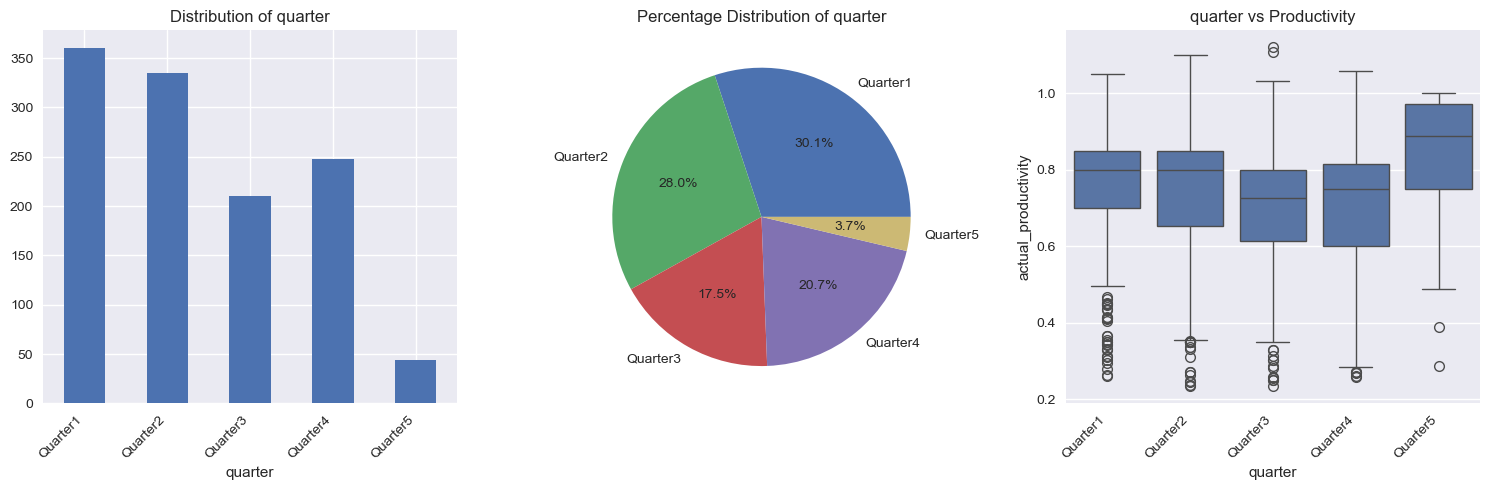

In [10]:
explore_categorical_feature(data, "quarter")

Oddly enough, a small percentage of the observations happened in the 5th quarter, even though there should only be 4.
Let's take a closer look:

In [11]:
data[data['quarter'] == "Quarter5"]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


All of the `Quarter5` observations happened on the last 2 days of January. I assume that the way quarters are calculated is that each quarter is a 7-days segment, so days 29-31 of each month will be allocated to quarter 5. 
Looking at the boxplot I can also see that `Quarter5` had a noticeably higher productivity, but that could be due to the small number of observations. I'll have to take that into consideration when building the model, should quarters prove to have high prediction power.

#### Department <a name="department_exploration">

department
finishing     249
finishing     257
sweing        691
Name: count, dtype: int64


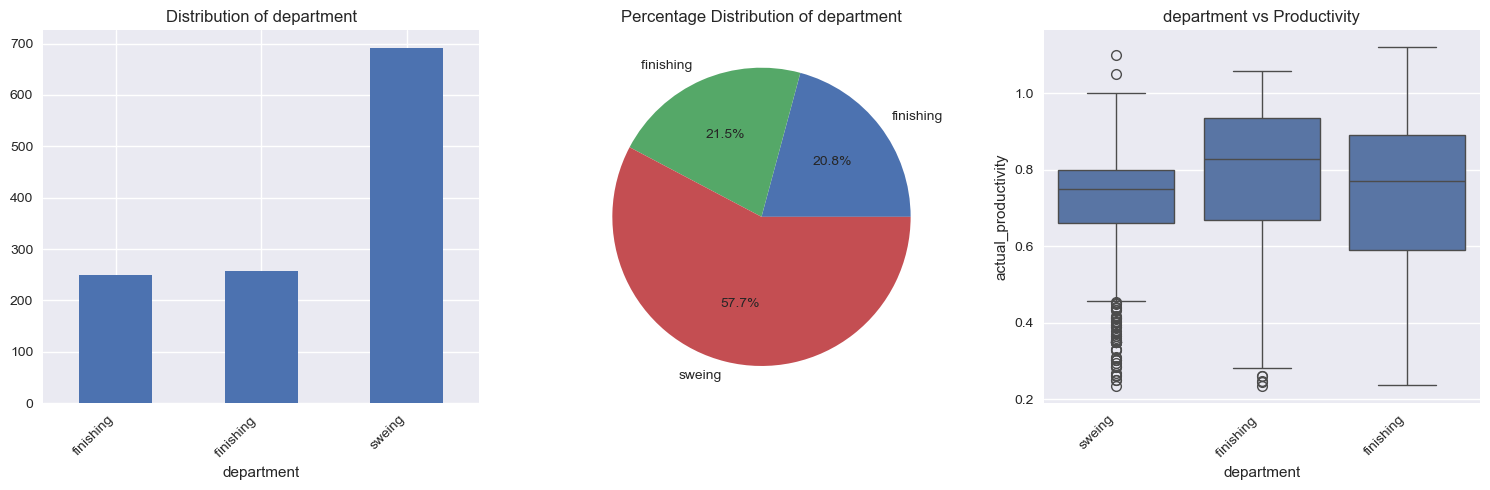

In [12]:
explore_categorical_feature(data, 'department')

The dataset has two departments called `finishing`. This is obviously wrong and probably due to a typo. I'll need to merge both departments in the data cleaning phase. Also, `sweing` is probably a typo and should be `sewing`. I'll fix that as well.

#### Day <a name="day"></a>

day
Monday       199.0
Tuesday      201.0
Wednesday    208.0
Thursday     199.0
Saturday     187.0
Sunday       203.0
Name: count, dtype: float64


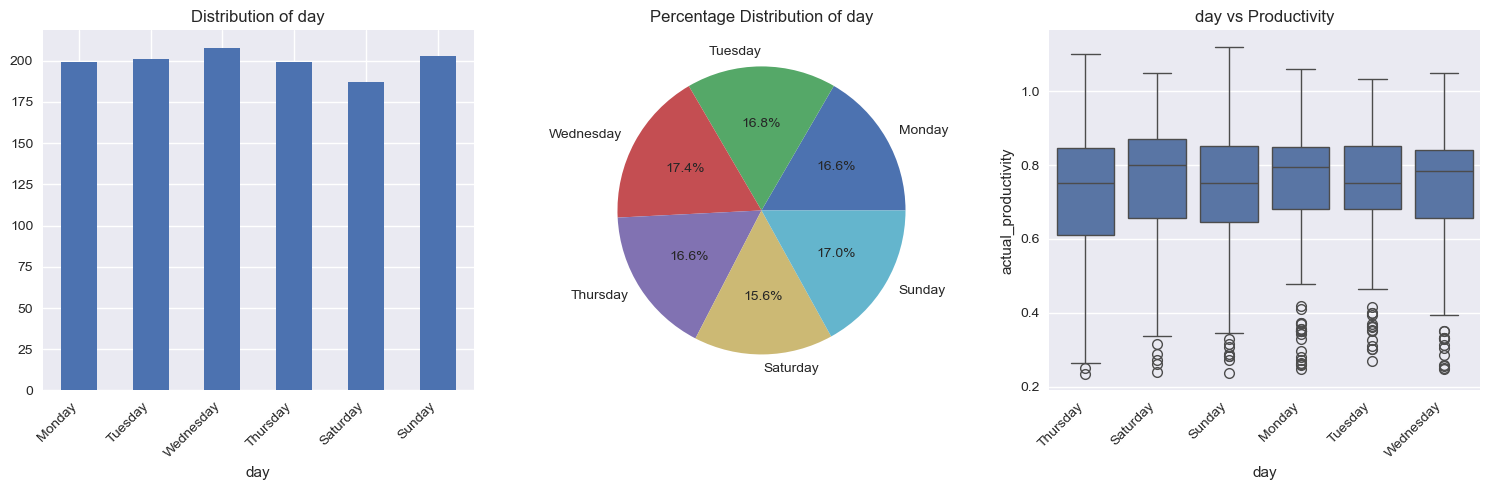

In [13]:
# Custom order of days, to make sure they're plotted in order 
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

explore_categorical_feature(data, 'day', days_order)

The days are pretty evenly distributed, and all have similar productivity. Also note that there are no entries for `Friday`, as I noticed when I explored the `date` feature.

#### Team <a name="team"></a>

team
1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: count, dtype: int64


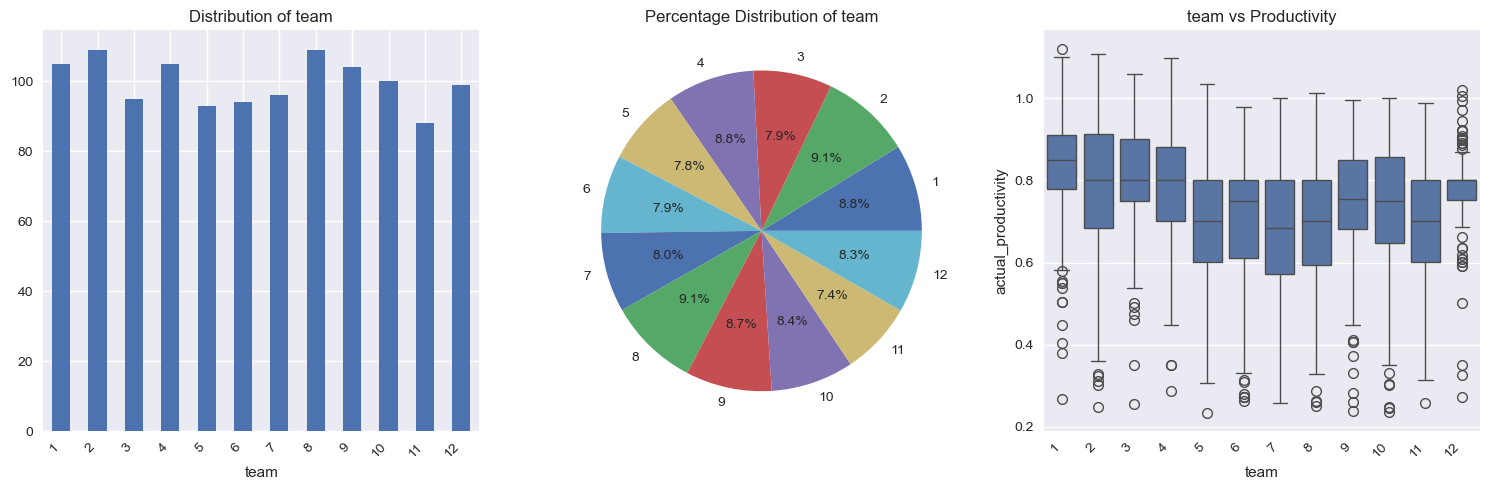

In [14]:
explore_categorical_feature(data, 'team')

#### Targeted Productivity <a name="targeted_productivity"></a>

targeted_productivity
0.07      1
0.35     27
0.40      2
0.50     49
0.60     57
0.65     63
0.70    242
0.75    216
0.80    540
Name: count, dtype: int64


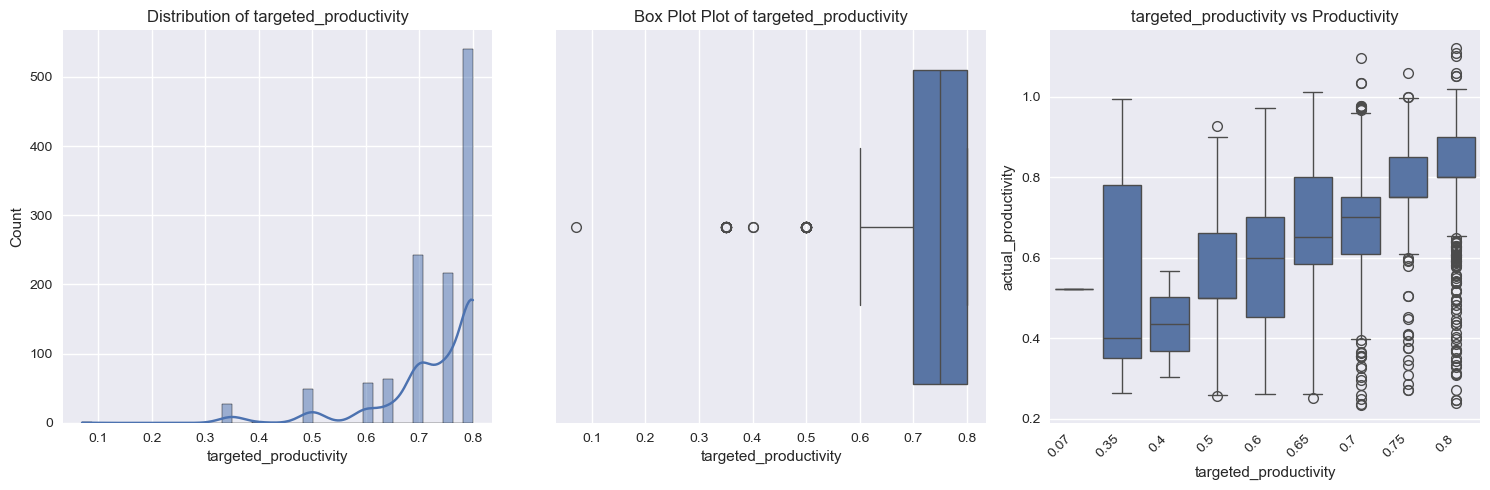

In [15]:
explore_numerical_feature(data, 'targeted_productivity')

The targeted productivity is mainly around `0.7`-`0.8`, with a median at about `0.75`. I can also notice a certain correlation with `actual_productivity`, where observations with a higher `targeted_productivity` have a higher `actual_producticity` median.

#### SMV <a name="smv"></a>

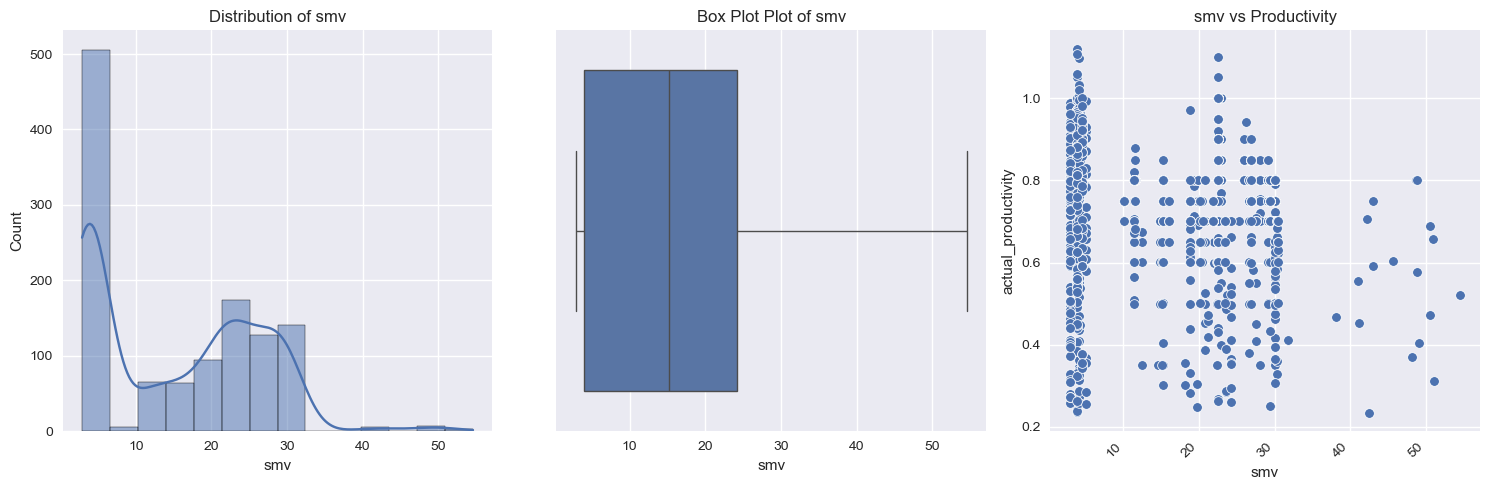

In [16]:
explore_numerical_feature(data, 'smv')

About half of the tasks have a low SMV (`0`-`5`), and the rest span up to about `30` with very few outliers.

#### WiP <a name="wip"></a>

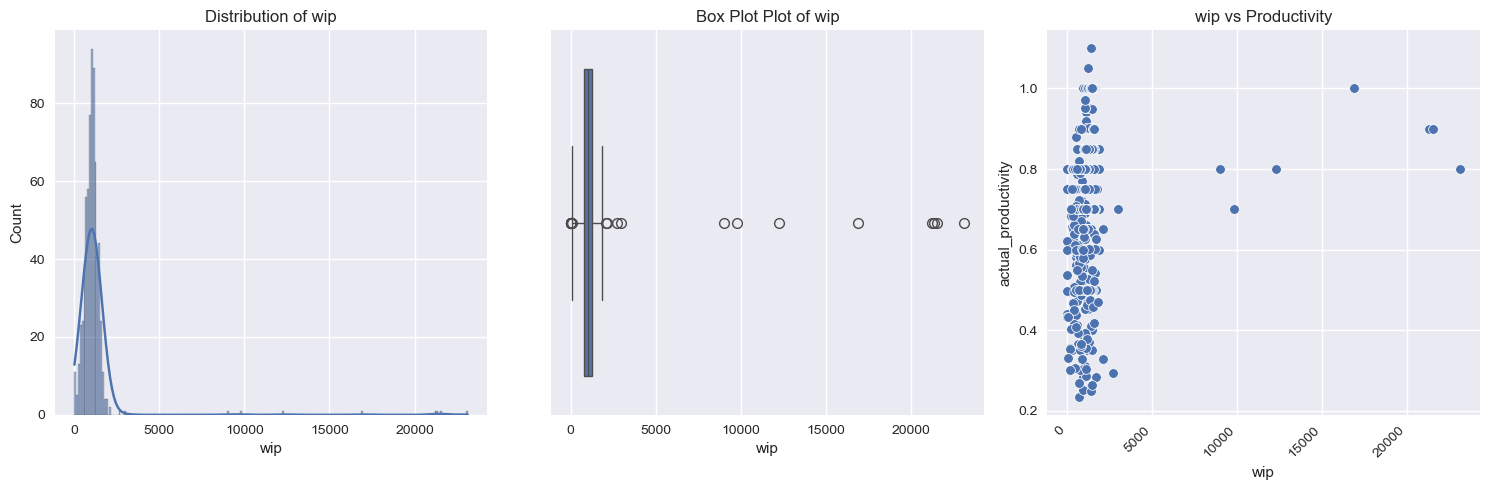

In [17]:
explore_numerical_feature(data, 'wip')

In [18]:
data['wip'].describe()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

It looks like WiP is normally distributed around a mean of 1,190 unfinished items, but there are several large outliers that skew the plot. Let's take a look at them:

In [19]:
data[data['wip'] > 5000]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
561,2/2/2015,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
563,2/2/2015,Quarter1,sweing,Monday,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158
564,2/2/2015,Quarter1,sweing,Monday,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142
565,2/2/2015,Quarter1,sweing,Monday,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130
568,2/2/2015,Quarter1,sweing,Monday,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35.0,0.800402
569,2/2/2015,Quarter1,sweing,Monday,4,0.80,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393
570,2/2/2015,Quarter1,sweing,Monday,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963
572,2/2/2015,Quarter1,sweing,Monday,11,0.70,20.55,9792.0,6480,60,0.0,0,0,54.0,0.700398


All of these observations happened on the same day (`2/2/2015`) and are associated with the sewing dept. What are the other observations made that day?

In [20]:
data[data['date'] == "2/2/2015"].sort_values(by="team")

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
561,2/2/2015,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
575,2/2/2015,Quarter1,finishing,Monday,1,0.75,3.94,NaN,2280,0,0.0,0,0,19.0,0.504596
563,2/2/2015,Quarter1,sweing,Monday,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158
564,2/2/2015,Quarter1,sweing,Monday,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142
567,2/2/2015,Quarter1,finishing,Monday,4,0.80,4.30,NaN,1440,0,0.0,0,0,12.0,0.809236
569,2/2/2015,Quarter1,sweing,Monday,4,0.80,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393
576,2/2/2015,Quarter1,sweing,Monday,5,0.50,30.10,839.0,6960,0,0.0,0,0,58.0,0.500802
578,2/2/2015,Quarter1,finishing,Monday,6,0.60,2.90,NaN,1200,0,0.0,0,0,10.0,0.280333
573,2/2/2015,Quarter1,sweing,Monday,6,0.70,18.79,2984.0,3960,30,0.0,0,0,33.0,0.700355
577,2/2/2015,Quarter1,sweing,Monday,7,0.70,24.26,2698.0,6720,0,0.0,0,0,56.0,0.295308


And the day after that?

In [21]:
data[data['date'] == "2/3/2015"].sort_values(by="team")

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
581,2/3/2015,Quarter1,sweing,Tuesday,1,0.80,22.52,1500.0,6900,113,0.0,0,0,57.5,1.000019
583,2/3/2015,Quarter1,finishing,Tuesday,1,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.994850
580,2/3/2015,Quarter1,finishing,Tuesday,2,0.80,3.94,NaN,2400,0,0.0,0,0,20.0,1.001417
586,2/3/2015,Quarter1,sweing,Tuesday,2,0.80,22.52,1452.0,6960,100,0.0,0,0,58.0,0.949982
585,2/3/2015,Quarter1,sweing,Tuesday,3,0.80,22.52,1112.0,6840,100,0.0,0,0,57.0,0.950186
596,2/3/2015,Quarter1,finishing,Tuesday,4,0.80,4.30,NaN,1440,0,0.0,0,0,12.0,0.537500
588,2/3/2015,Quarter1,sweing,Tuesday,4,0.80,22.52,340.0,5460,63,0.0,0,0,56.5,0.800435
598,2/3/2015,Quarter1,sweing,Tuesday,5,0.60,30.10,415.0,6960,0,0.0,0,0,58.0,0.415172
597,2/3/2015,Quarter1,finishing,Tuesday,6,0.70,2.90,NaN,960,0,0.0,0,0,8.0,0.495417
593,2/3/2015,Quarter1,sweing,Tuesday,6,0.70,18.79,913.0,4020,30,0.0,0,0,33.5,0.700185


Okay, nothing stands out. Perhaps a lot of new orders came in that day, and were handled by teams 1-4 and 9-12.

One more thing to investigate is the `NaN` values in this column. Looking at the tables above I suspect that it's related to the department. Let's check:

In [22]:
data[data['wip'].isnull()]['department'].value_counts()

department
finishing     257
finishing     249
Name: count, dtype: int64

As shown in the `department` section above, these are the same numbers as the `finishing` department in total, which leads me to conclude that the `finishing` department doesn't have `wip` data.

Finally, since this measures a discrete value the column's type should be converted to `Int64`, to match the features table.

#### Overtime <a name="over_time"></a>

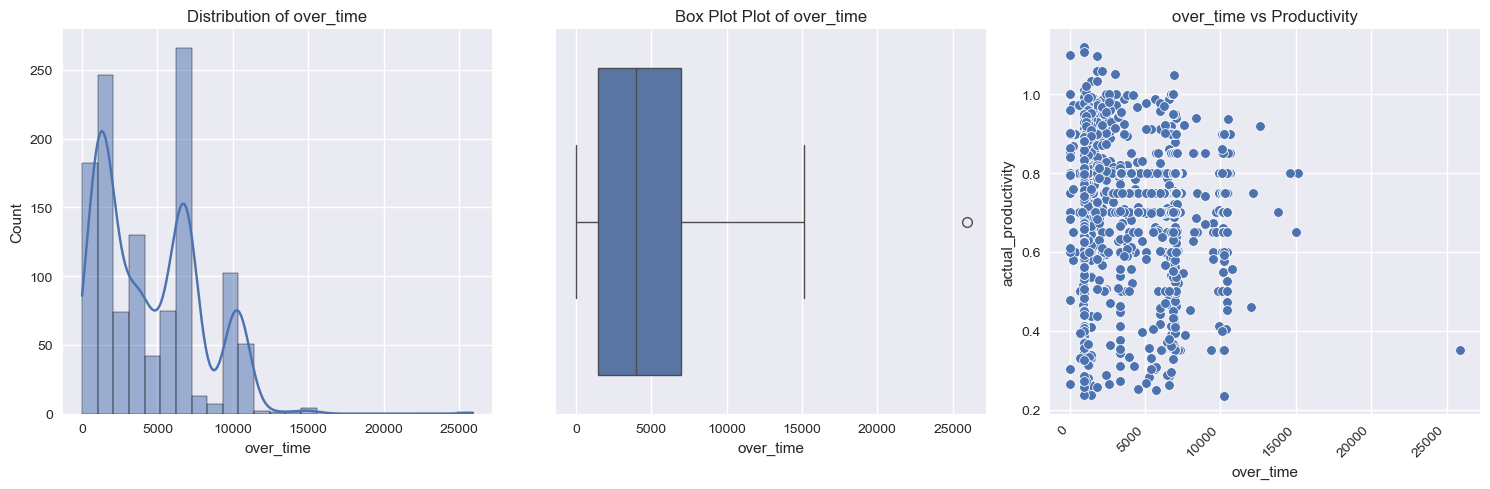

In [23]:
explore_numerical_feature(data, 'over_time')

There are two peaks around `2,000` and around `7,000` minutes. There's no apparent correlation with the productivity, but I'll need to take the targeted productivity into account to know if the employees reached their goals or not.

#### Incentive <a name="incentive"></a>

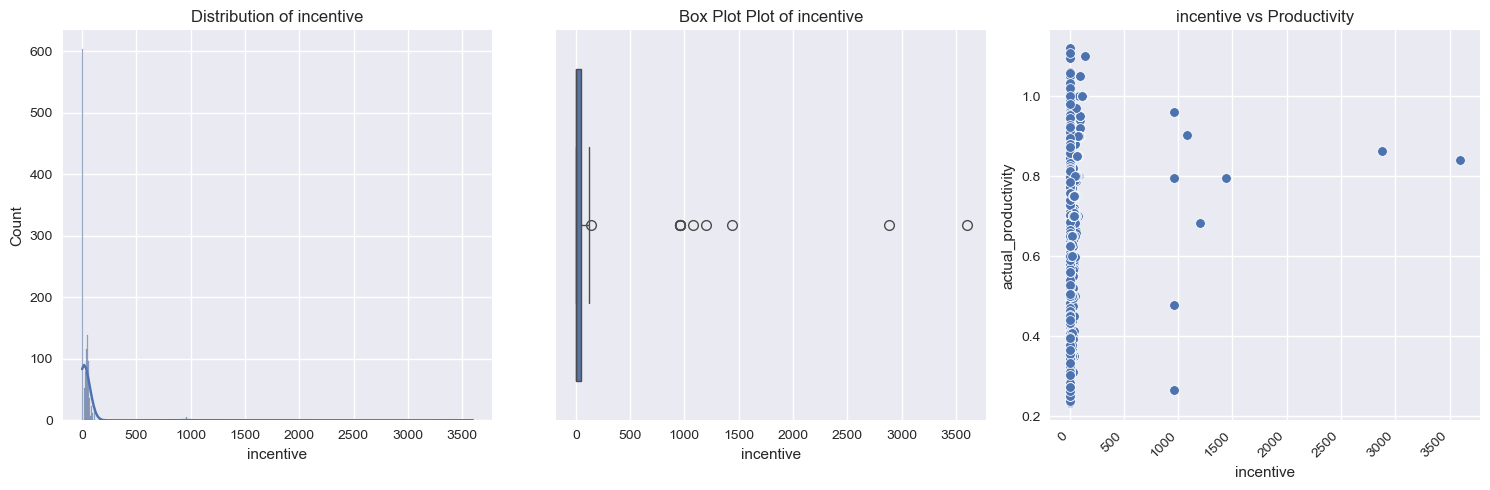

In [24]:
explore_numerical_feature(data, 'incentive')

The incentive is mostly centred around 0, with a relatively small number of other values. Due to the dominance of the `0` values it's quite hard to extract any information from the plots. Let's generate the plots again, this time leaving out observations where the `incentive` is `0`:

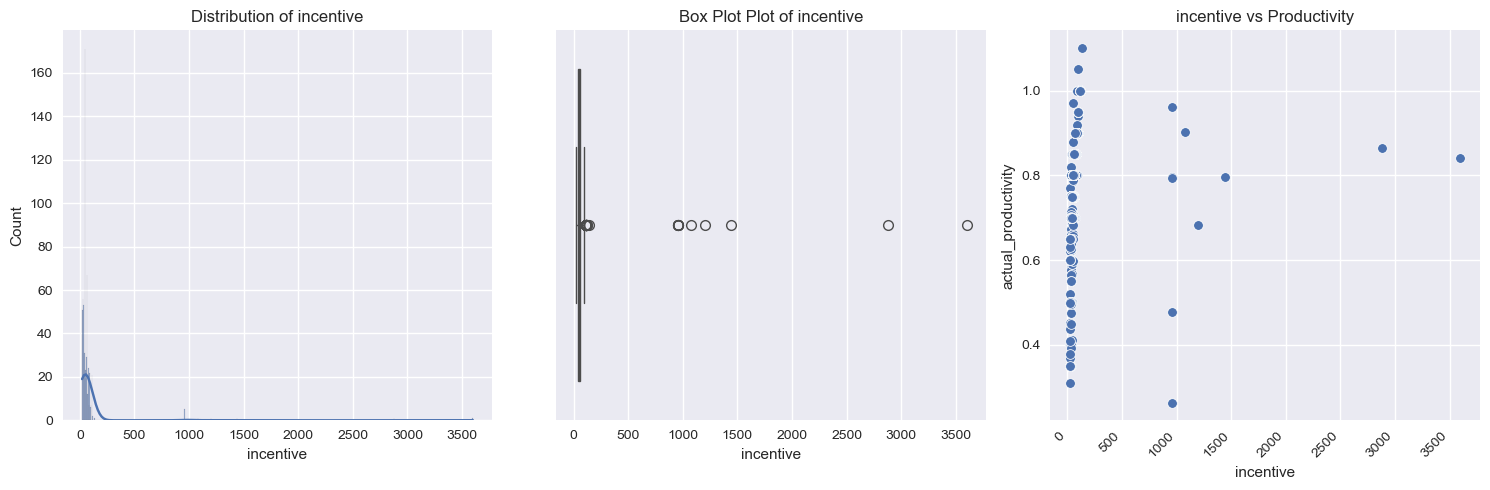

In [25]:
explore_numerical_feature(data[data['incentive'] != 0], 'incentive')

While the larger outliers do seem to have a relatively high productivity (`0.8`-`0.9`), there aren't enough observations to determine correlation. Let's plot the column one last time, this time filtering out the outliers:

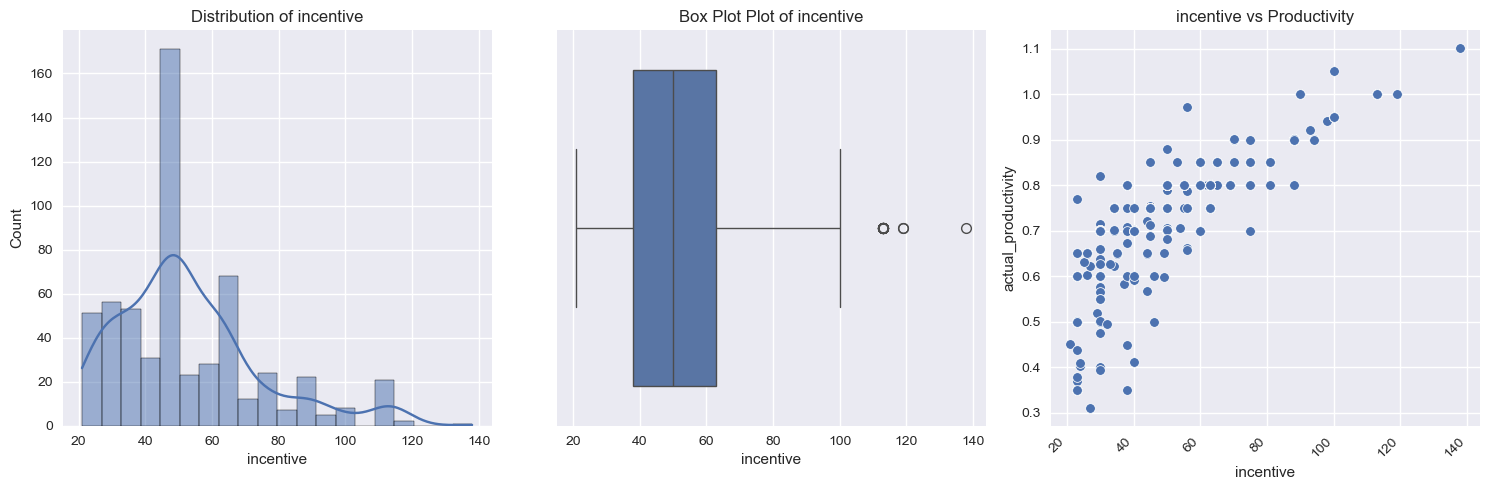

In [26]:
explore_numerical_feature(data[(data['incentive'] > 0) & (data['incentive'] < 200)], 'incentive')

In [30]:
corr = data['actual_productivity'].corr(data[(data['incentive'] > 0) & (data['incentive'] < 200)]['incentive'])
print(f"Correlation between 0 < 'incentive' < 200 and 'actual_productivity': {corr}")

Correlation between 0 < 'incentive' < 200 and 'actual_productivity': 0.8083750935775356


Here we can actually see a nice correlation, where the productivity tends to increase with the incentive, as long as the incentive isn't too high.

#### Idle Time <a name="idle_time"></a>

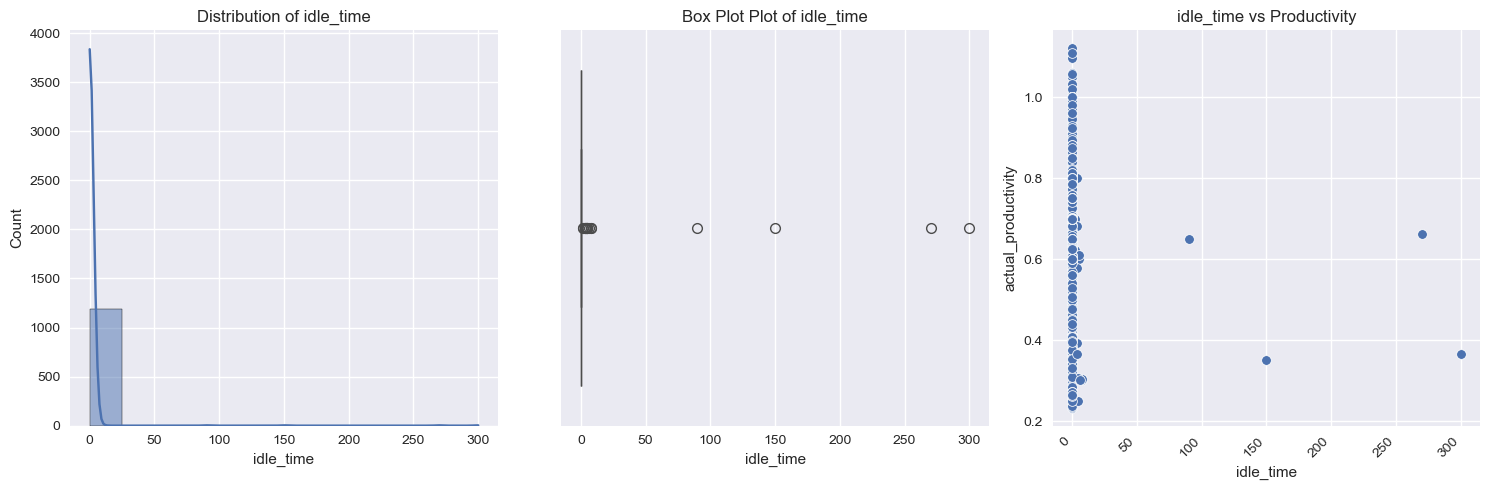

In [27]:
explore_numerical_feature(data, 'idle_time')

In [28]:
data['idle_time'].value_counts()

idle_time
0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: count, dtype: int64

This feature is dominated by zeros and a small number (18) of outliers. It probably won't be useful when building the model.

#### Idle Men <a name="idle_men"></a>

idle_men
0     1179
10       3
15       3
20       3
25       1
30       3
35       2
37       1
40       1
45       1
Name: count, dtype: int64


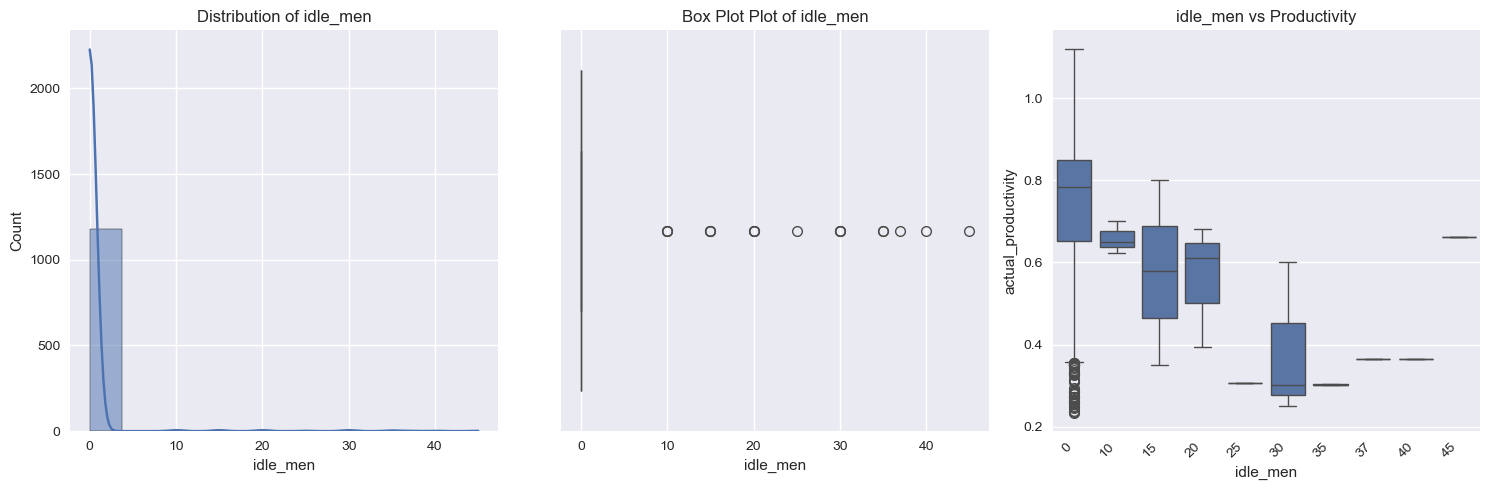

In [29]:
explore_numerical_feature(data, 'idle_men')

Like `idle_time`, idle_men predominantly contains zero values, with only 18 non-zero entries. Let's verify if these non-zero entries correspond to the same observations in `idle_time`.

In [30]:
data[data['idle_men'] != 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
775,2/15/2015,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
822,2/17/2015,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
841,2/18/2015,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399


Yes, those are the same entries. And as above, probably won't be useful for this project's goals.

#### No. of Style Changes <a name="no_of_style_change"></a>

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64


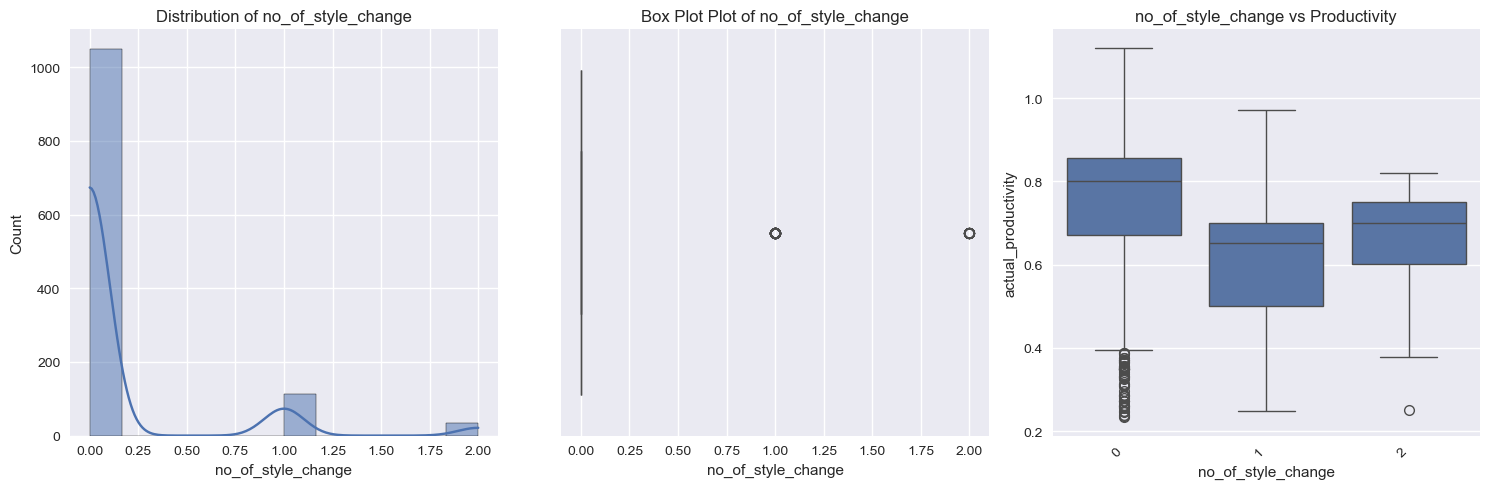

In [31]:
explore_numerical_feature(data, 'no_of_style_change')

Out of 1,197 observations, only 147 aren't `0`. Again, not much we can get from this feature.

#### No. of Workers <a name="no_of_workers"></a>

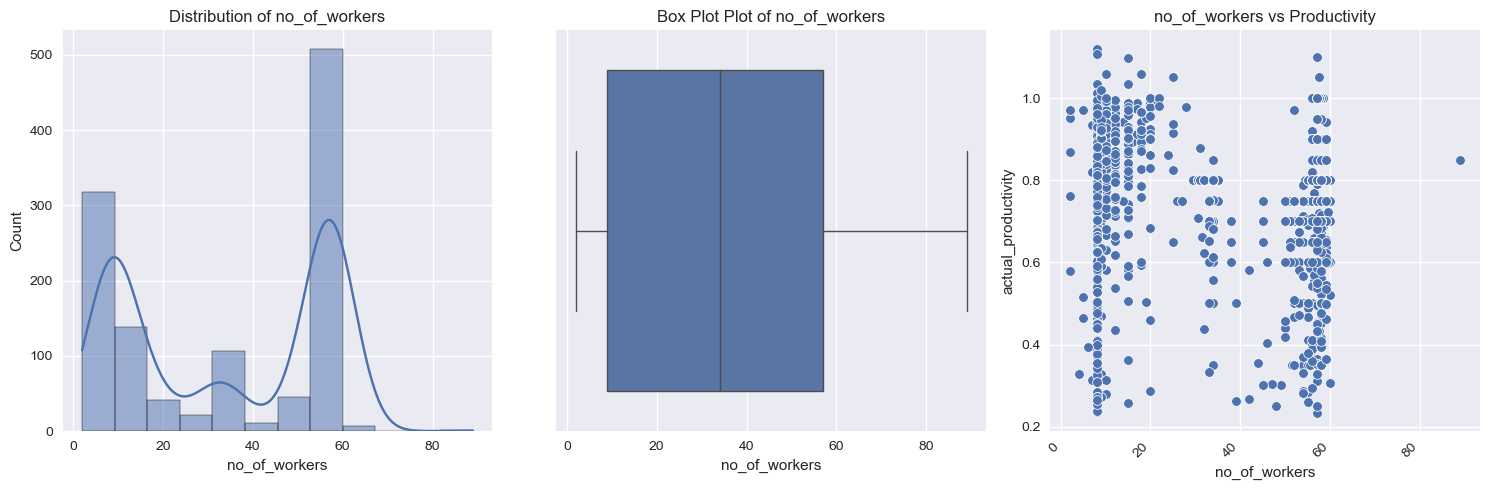

In [32]:
explore_numerical_feature(data, 'no_of_workers')

Two peaks, around `10` and `60`.\
To match the features table, the column should be converted to `Int64`.

## Dataset Cleaning <a name="dataset_cleaning"></a>

Now that I've explored every feature, it's time to perform some data cleaning with two objectives in mind:

* Decide which features I will keep to fit the decision tree algorithm
* Fix any incorrect observations that could be present in the remaining features

### Deciding Which Features to Keep <a name="deciding_which_features_to_keep">

Based on the result of the previous section, I've decided to drop the following features from the dataset:
* `idle_time`
* `idle_men`
* `no_of_style_change`

They don't have enough distinct values to make a meaningful prediction.

In [33]:
data.drop(['idle_time', 'idle_men', 'no_of_style_change'], axis=1, inplace=True)

### Cleaning the Remaining Features <a name="cleaning_the_remaining_features">

#### Department <a name="department_clean">

As I mentioned above, I'd need to merge both `finishing` columns and fix the typo in the `sweing` column:

In [34]:
data.replace({'department': {"sweing": "sewing", "finishing ": "finishing"}}, inplace=True)

Let's explore that column once more, now that it's been fixed:

department
finishing    506
sewing       691
Name: count, dtype: int64


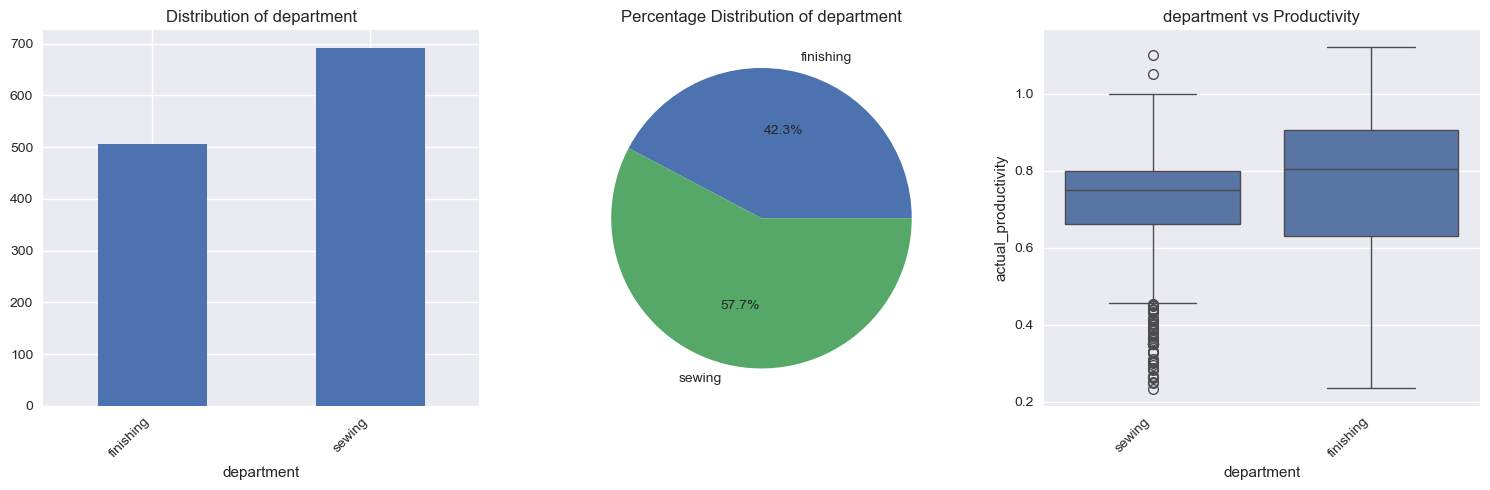

In [35]:
explore_categorical_feature(data, 'department')

#### Date <a name="date_clean">

The date column needs to be converted into `DataTime`:

In [36]:
data['date'] = pd.to_datetime(data['date'])

Now I can find how it correlates with `actual_productivity` and draw a scatter plot:

In [37]:
corr = data['actual_productivity'].corr(data['date'])
print(f"Correlation between 'date' and 'actual_productivity': {corr}")

Correlation between 'date' and 'actual_productivity': -0.12257480040343235


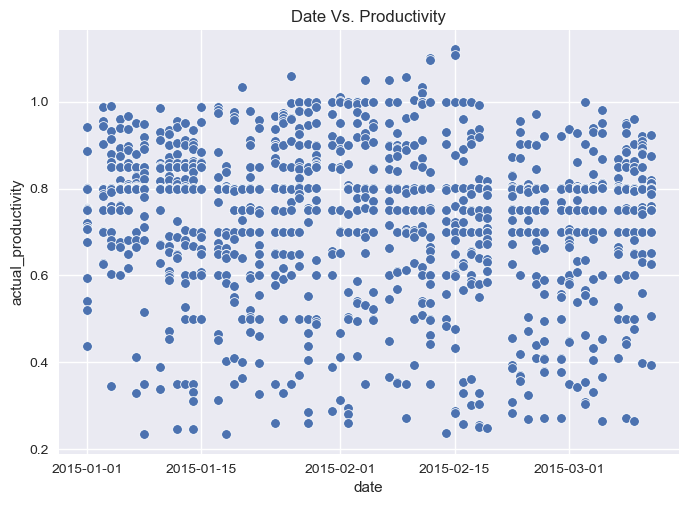

In [38]:
sns.scatterplot(x='date', y='actual_productivity', data=data)
plt.title("Date Vs. Productivity")
plt.show()

It's quite clear from the scatter plot and the correlation value that the date has no predictive power when it comes to `actual_productivity`, so it's safe to remove it from the dataset.

In [39]:
data.drop(['date'], axis=1, inplace=True)

In [40]:
data.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

#### Quarter <a name="quarter_clean">

To make analysis easier I'll convert the value in this column into `int`:

In [43]:
data = data.replace({'quarter':{'Quarter1': 1, 
                     'Quarter2': 2,
                     'Quarter3': 3,
                     'Quarter4': 4,
                     'Quarter5': 5}})

In [44]:
data['quarter'].value_counts()

quarter
1    360
2    335
4    248
3    210
5     44
Name: count, dtype: int64

#### WiP <a name="wip_clean">

The WiP column holds the number of unfinished items, so it should be an `int` rather than `float`:

In [45]:
data['wip'] = data['wip'].astype('Int64')

#### No. of Workers <a name="no_of_workers_clean">

Likewise, the `no_of_workers` column needs to be converted to an `int`:

In [50]:
data['no_of_workers'] = data['no_of_workers'].round().astype('Int64')

#### Creating a Target Column <a name="creating_a_target_column">

Since this is project deals with a classification tree, I can't use the `actual_productivity` column as my target column, since the target needs to be categorical.
What I can do is create a new boolean column that checks if the workers have reached their targeted productivity, by comparing `actual_productivity` and `targeted_productivity`:

In [52]:
data['productive'] = data['actual_productivity'] >= data['targeted_productivity']
# Now it's safe to drop the 'actual_productivity' column, since it's no longer needed
data = data.drop('actual_productivity', axis=1)

In [53]:
data['productive'].value_counts()

productive
True     875
False    322
Name: count, dtype: int64

### Categorical to Numeric <a name="categorical_to_numeric">

 Since scikit-learn only works with numerical data, I need to convert some columns from categorical to numerical to use them in the model.


In [54]:
categorical_cols = ['quarter', 'department', 'day', 'team']

In [55]:
# Getting the dummies and removing the categorical columns. setting drop_first to True, to reduce the number of features
data_dummies = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

Finally, the dataset is clean and ready to be the model's input.

In [56]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  1197 non-null   float64
 1   smv                    1197 non-null   float64
 2   wip                    691 non-null    Int64  
 3   over_time              1197 non-null   int64  
 4   incentive              1197 non-null   int64  
 5   no_of_workers          1197 non-null   Int64  
 6   productive             1197 non-null   bool   
 7   quarter_2              1197 non-null   bool   
 8   quarter_3              1197 non-null   bool   
 9   quarter_4              1197 non-null   bool   
 10  quarter_5              1197 non-null   bool   
 11  department_sewing      1197 non-null   bool   
 12  day_Saturday           1197 non-null   bool   
 13  day_Sunday             1197 non-null   bool   
 14  day_Thursday           1197 non-null   bool   
 15  day_

## Building the Tree <a name="building_the_tree">

I'm now ready to build the decision tree:

In [57]:
# Create the feature and target columns

X = data_dummies.drop("productive", axis = 1)
y = data_dummies["productive"]

# Divide in training and test sets with train_test_split. Setting random_state to 755 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 755)

# Instantiate and fit a decision tree classifier. Setting max_depth to 4, to reduce complexity and random_state to 755 for reproducibility 
tree = DecisionTreeClassifier(max_depth=4, random_state = 755)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=755)

In [58]:
# Use the tree to make the predictions on the test set
y_pred = tree.predict(X_test)

## Visualising and Evaluating the Tree <a name="visualising_and_evaluating_the_tree">

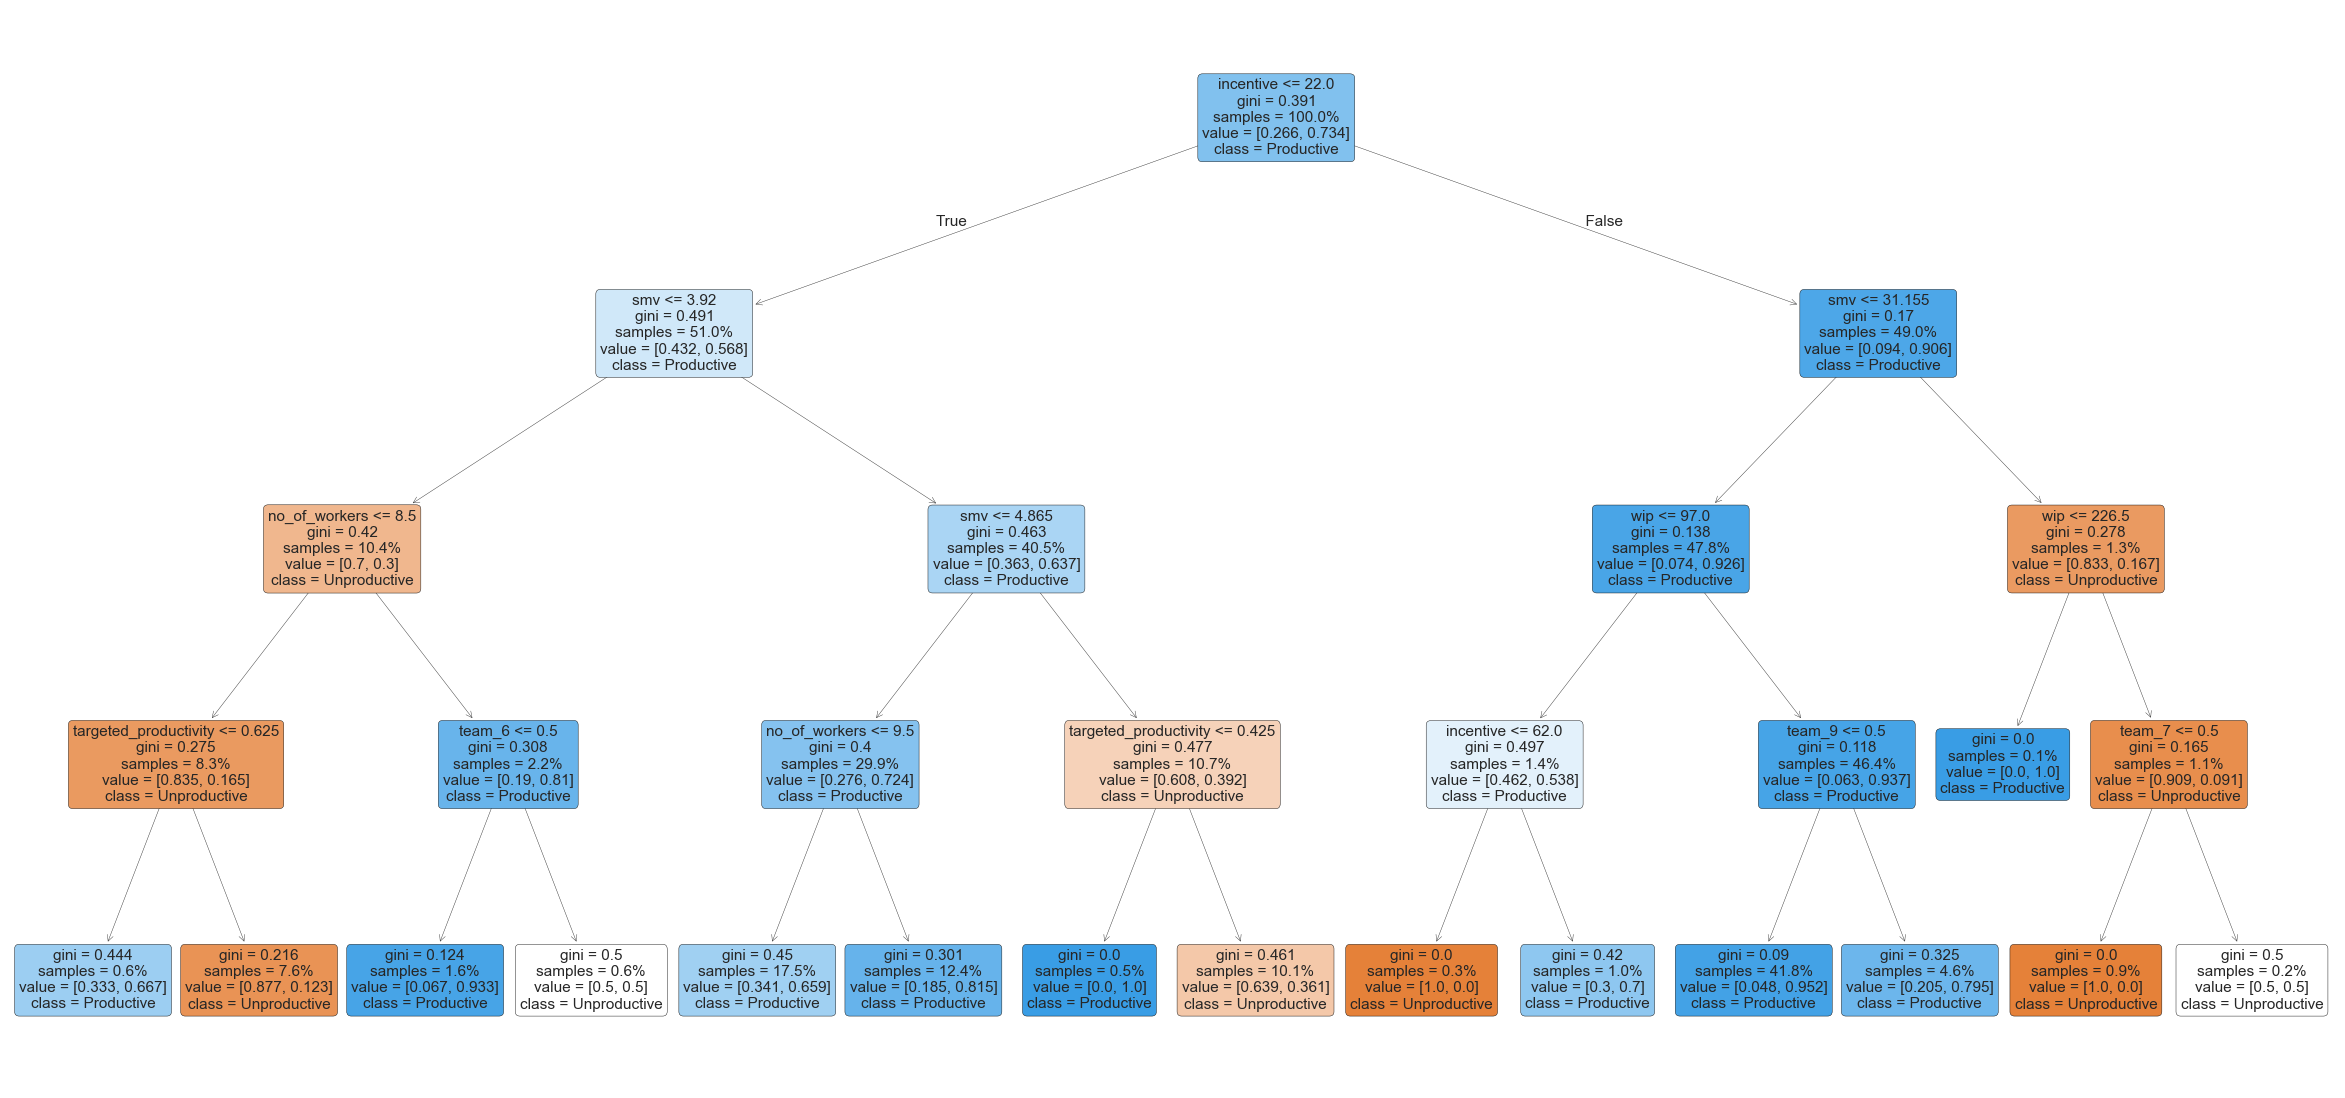

In [59]:
# Setting plot size
plt.figure(figsize = [30, 14])

# Plotting the tree with some specific parameters:
# class_names: Using 'Unproductive' and 'Productive' instead of False and True
# filled: Show color-coded nodes
# rounded: Use rounded corners
# proportion: Display number of samples and values as a proportion of the dataset's size
_ = plot_tree(tree, 
              feature_names = X.columns, 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = True, 
              proportion = True, 
              fontsize = 11)

That's our tree. Let's get some metrics about it:

In [60]:
def evaluate_model(y_true, y_pred, y_prob):
    """
    Comprehensive model evaluation function
    
    Parameters:
    y_true: True labels
    y_pred: Predicted labels
    y_prob: Predicted probabilities
    """
    # 1. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # 2. Confusion Matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=['Unproductive', 'Productive'], text_kw={'fontsize': 12})
    plt.title('Confusion Matrix for the Tree Classification Model', fontsize = 14, pad=20)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    
    # 3. Detailed Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
          
    # 4. Additional Performance Metrics
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    print("\nDetailed Performance Metrics:")
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"\nSensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1_score:.4f}")

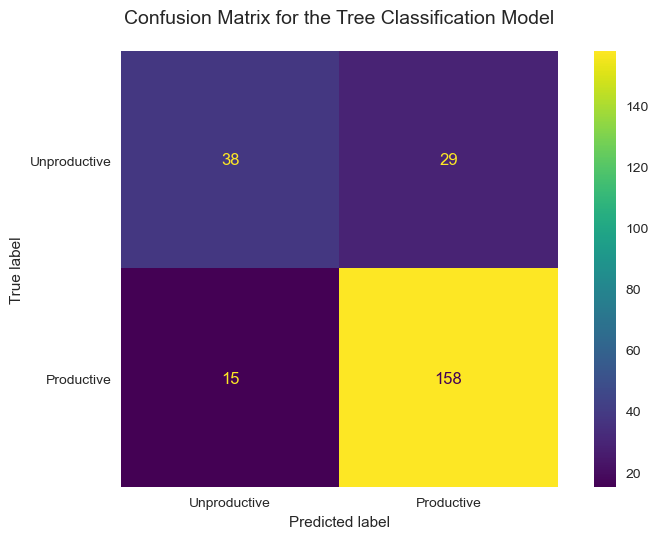

Classification Report:
              precision    recall  f1-score   support

       False       0.72      0.57      0.63        67
        True       0.84      0.91      0.88       173

    accuracy                           0.82       240
   macro avg       0.78      0.74      0.76       240
weighted avg       0.81      0.82      0.81       240


Detailed Performance Metrics:
True Positives (TP): 158
True Negatives (TN): 38
False Positives (FP): 29
False Negatives (FN): 15

Sensitivity (Recall): 0.9133
Specificity: 0.5672
Precision: 0.8449
F1 Score: 0.8778


In [61]:
y_test_prob = tree.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred, y_test_prob)

The classification tree demonstrates strong overall performance in predicting employee productivity, with an impressive `81%` accuracy across the dataset. The model shows particularly robust performance in identifying positive cases (True class), with a high precision of `0.85` and an exceptional recall of `0.9`.
This indicates that the model is highly effective at correctly identifying instances of high productivity, successfully capturing `90%` of the actual high-productivity observations while maintaining a low false positive rate.

However, the model's performance is less consistent when predicting low productivity (False class), with lower precision (`0.70`) and recall (`0.58`). The specificity of `0.58` suggests that the model struggles to correctly identify negative cases, misclassifying a significant portion of low-productivity instances. The imbalance in performance between True and False classes might be due to class distribution (`173` True vs. `67` False instances) or underlying complexities in the features that distinguish low-productivity scenarios. 

It also shows that the features with the highest predictive power are `incentive` and `smv`.

## Explaining the Tree <a name="explaining_the_tree">

Decision trees are a way to visually model how a machine learning algorithm makes decisions. They start with a broad question at the top, then break that down into more specific questions, branching out like the limbs of a tree. Each branching point is called a "node," and the final outcomes are called "leaves."

In this case, the decision tree is trying to predict whether a team will be "Productive" or "Unproductive" based on various factors about its work. The top node asks whether the team's `incentive` is above or below 22. If it's above, the tree then looks at the `smv` and compares it to 31.155; if the `incentive` is below 0.4, it compares the `smv` to 3.92, and so forth.

The tree continues to branch out, using thresholds for metrics like `over_time` and `targeted_productivity` until it reaches one of the leaves, and then categorizes each employee as Productive or Unproductive. By following the branches, you can see the logic the model uses to make its predictions.

**Let's use an example:**

Here's a randomly generated observation:

`quarter`: 3,\
`department`: 'finishing',\
`day`: 'Thursday',\
`team`: 5,\
`targeted_productivity`: 0.8,\
`smv`: 20,\
`wip`: 0,\
`over_time`: 5,500,\
`incentive`: 0,\
`no_of_workers`: 55

How would the tree categorise it?
We start by looking at the `incentive`, It's 0, so lower than 22, so we move to the left branch to check the `smv`.\
The `smv` value is 20, which is higher than 3.92, so we move down the right branch to check the `smv` again. 20 is more than 4.865 so we move right to check `targeted_productivity`, which is 0.8. 0.8 is more than 0.425 so we move right one last time to categorise this entry as `Unproductive`.\
The node's hue is an indicator of the level of certainty the model has in its decision. So in this case, since the leaf is a fairly light orange, we know that the tree's certainty in the categorisation isn't high.

All-in-all, the performance metrics shown indicate that this particular decision tree model is quite accurate, correctly identifying Productive employees `92%` of the time and Unproductive employees `58%` of the time. The overall accuracy is `83%`, which is a solid result. This tree-based model could therefore be a useful tool to help managers identify which employees may need additional support or coaching to improve their productivity.

## Using Random Forest <a name="using_random_forest">

Now that we have a baseline tree, we can use the Random Forest method to try and improve the tree's accuracy.

In [62]:
# Create a Random Forest Classifier model, setting random_state to ensure reproducibility
# Setting oob_score to True provides an unbiased estimate of the model's generalization error
forest = RandomForestClassifier(
                                oob_score = True,                                  
                                random_state = 10
                               )

forest.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=10)

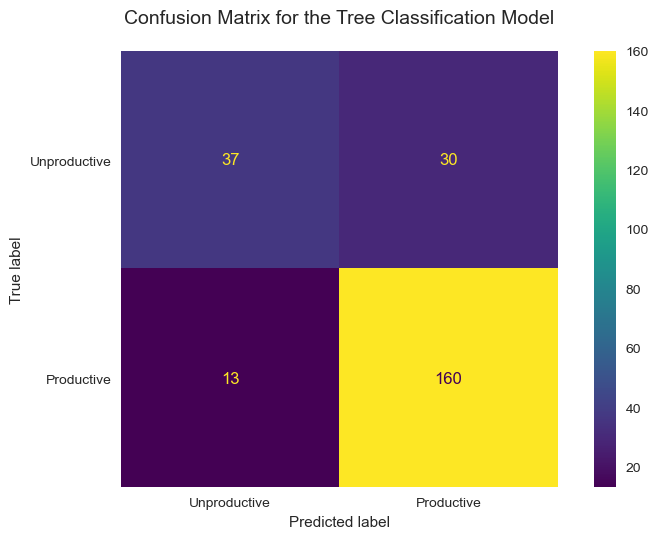

Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.55      0.63        67
        True       0.84      0.92      0.88       173

    accuracy                           0.82       240
   macro avg       0.79      0.74      0.76       240
weighted avg       0.81      0.82      0.81       240


Detailed Performance Metrics:
True Positives (TP): 160
True Negatives (TN): 37
False Positives (FP): 30
False Negatives (FN): 13

Sensitivity (Recall): 0.9249
Specificity: 0.5522
Precision: 0.8421
F1 Score: 0.8815


In [64]:
y_pred_forest = forest.predict(X_test)
y_test_prob_forest = forest.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_forest, y_test_prob_forest)

Using Random Forest performs didn't improve the model, and left all metrics pretty much as they were.

I can try improving the model by using hyperparameter optimisation:

### Hyperparameter Optimisation <a name="hyperparameter_optimisation">

In [72]:
def tune_random_forest(X, y, forest):
    """
    Perform hyperparameter tuning for a Decision Tree Classifier
    with a focus on improving specificity
    
    Parameters:
    X : feature matrix
    y : target variable
    
    Returns:
    The grid_search object
    """
    param_grid = {
        # Adjust max_depth to control overfitting and tree complexity
        'max_depth': [3, 4, 5, 7, 10],
        
        # Modify min_samples_split to control tree growth
        'min_samples_split': [2, 5, 10, 15],
        
        # Adjust min_samples_leaf to reduce overfitting
        'min_samples_leaf': [1, 2, 4, 6],
        
        # Control class imbalance
        'class_weight': [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}]
    }
    
    # Use StratifiedKFold to maintain class distribution
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    
    grid_search = GridSearchCV(
        estimator=forest,
        param_grid=param_grid,
        cv=cv,
        scoring="accuracy",
        verbose=2,
        n_jobs=-1  # Use all available cores
    )
    
    grid_search.fit(X, y)
    
    return grid_search

In [73]:
grid_search = tune_random_forest(X, y, forest)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


In [74]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best params: {best_params}")

Best params: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


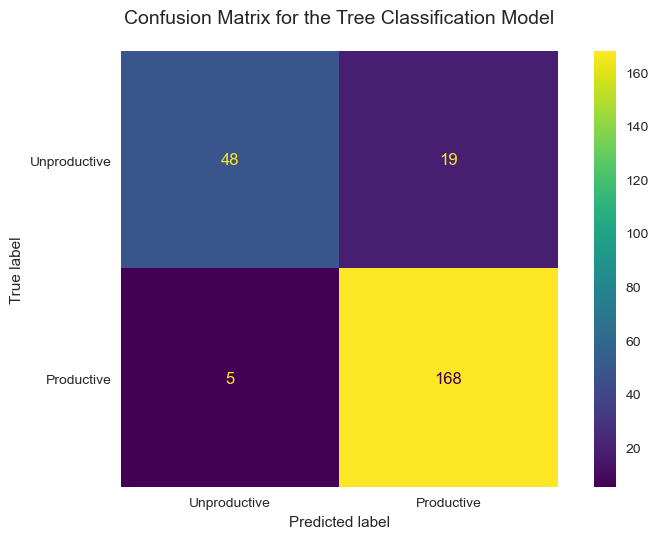

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.72      0.80        67
        True       0.90      0.97      0.93       173

    accuracy                           0.90       240
   macro avg       0.90      0.84      0.87       240
weighted avg       0.90      0.90      0.90       240


Detailed Performance Metrics:
True Positives (TP): 168
True Negatives (TN): 48
False Positives (FP): 19
False Negatives (FN): 5

Sensitivity (Recall): 0.9711
Specificity: 0.7164
Precision: 0.8984
F1 Score: 0.9333


In [75]:
y_pred = grid_search.predict(X_test)
y_test_prob = grid_search.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred, y_test_prob)

Using hyperparameter optimisation of the random forest I managed to improve every metric significantly:\

accuracy: `90%` vs. `82%`\
sensitivity: `97%` vs. `93%`\
precision: `90%` vs. `84%`\
F1 score: `93%` vs. `88%`\
specificity: `71%` vs. `55%`

## Conclusion <a name="conclusion">

In this project, I used a Decision Tree classifier, Random Forest classifier and hyperparameter tuning to come up with a model that will be able to predict the productivity of employees by using the provided parameters, such as incentive, work-in-progress and Standard Minute Value.

I managed to create a model with a very high accuracy rate of 90% on the test set. While its sensitivity is a very high 97%, the specificity is a bit low, at only 71%, meaning the model is very good at identifying positive (`Productive`) cases, its ability to identify negative ones (`unproductive`) is a bit lacking.\
To improve the model, future iterations could focus on techniques like class balancing, feature engineering, or exploring alternative tree-based algorithms that might better capture the nuances of low-productivity prediction.

**
Important points**:
* Understanding the data is vital to building a good model. Being able to identify the features that may have predictive power and drop the rest is crucial in building robust models
* It's said that data cleaning is 80% of a data scientist's job, and that was definitely true for this project. I took the time to explore each feature, understand and clean it, to allow the model to be robust
* Make sure you know what your target feature is. While the dataset had an `actual_productivity` column, it wasn't good as a target for a classifier. I needed to create a categorical `productive` column to serve as the model's target
* The model's parameters can entirely change its performance. Before using hyperparameter tuning, the model I created had about `83%` success rate, with a very low specificity (`55%`). Tuning the parameters made it much more robust